## Import Libraries

** Import the libraries you usually use for data analysis.**

In [34]:
import numpy as np
import pandas as pd

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [35]:
data = pd.read_csv('Mall_Customers.csv',index_col=0)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


**Check the head of the data**

In [36]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


** Check the info() and describe() methods on the data.**

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [38]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [39]:
import seaborn as sns
sns.set_style('whitegrid')


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

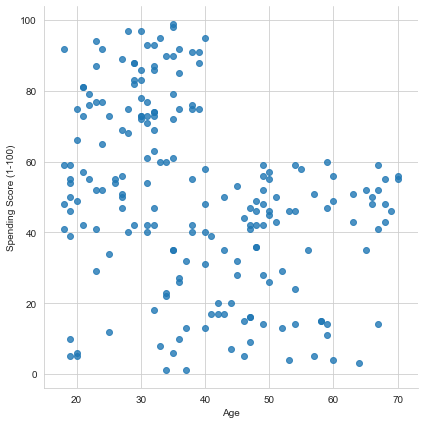

In [41]:
sns.lmplot('Age','Spending Score (1-100)',data=data,palette = 'coolwarm',size = 6,aspect=1,fit_reg=False)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [44]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [45]:
kmeans = KMeans(n_clusters = 4)

In [46]:
data.head()
dtcopy = data.copy()
dtcopy.drop('Gender',axis = 1, inplace = True)
dtcopy.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


**Fit the model to all the data except for the Private label.**

In [47]:
kmeans.fit(dtcopy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

** What are the cluster center vectors?**

In [48]:
centroids = kmeans.cluster_centers_
centroids

array([[32.69230769, 86.53846154, 82.12820513],
       [40.39473684, 87.        , 18.63157895],
       [24.82142857, 28.71428571, 74.25      ],
       [44.89473684, 48.70526316, 42.63157895]])

In [49]:
dtcopy.head()


,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [50]:
labels = kmeans.predict(dtcopy)
labels

array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [51]:
y_predicted = kmeans.fit_predict(dtcopy[['Age','Spending Score (1-100)']])
y_predicted

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [52]:
dtcopy['cluster'] = y_predicted
dtcopy.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,19,15,39,0
2,21,15,81,1
3,20,16,6,2
4,23,16,77,1
5,31,17,40,0


No handles with labels found to put in legend.


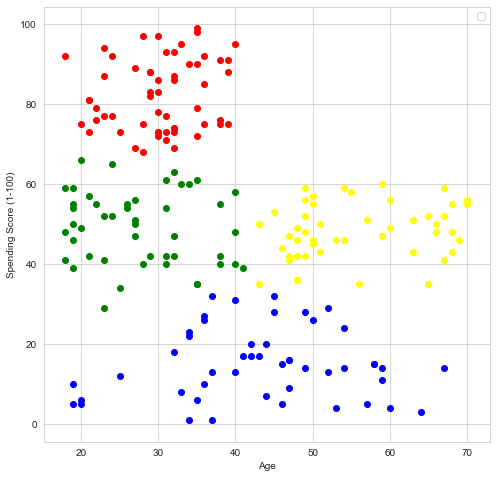

In [59]:
fig = plt.figure(figsize=(8,8))

dtcopy1 = dtcopy[dtcopy.cluster==0]
dtcopy2 = dtcopy[dtcopy.cluster==1]
dtcopy3 = dtcopy[dtcopy.cluster==2]
dtcopy4 = dtcopy[dtcopy.cluster==3]

plt.scatter(dtcopy1.Age,dtcopy1['Spending Score (1-100)'],color='green')
plt.scatter(dtcopy2.Age,dtcopy2['Spending Score (1-100)'],color='red')
plt.scatter(dtcopy3.Age,dtcopy3['Spending Score (1-100)'],color='blue')
plt.scatter(dtcopy4.Age,dtcopy4['Spending Score (1-100)'],color='yellow')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.legend()

Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!

In [22]:
##from sklearn.preprocessing import MinMaxScaler
##scaler = MinMaxScaler()


In [25]:

#scaler.fit(dtcopy[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
#dtcopy['Age'] = scaler.transform(dtcopy[['Age']])

In [27]:
#dtcopy['Annual Income (k$)'] = scaler.transform(dtcopy[['Annual Income (k$)']])

In [56]:
##How to find K?

k_rng = range(1,10)
sse = []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(dtcopy[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [57]:
sse

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23849.72275616578,
 19566.522341377604,
 15514.19313435103,
 13054.172145982673,
 11452.382085278556]

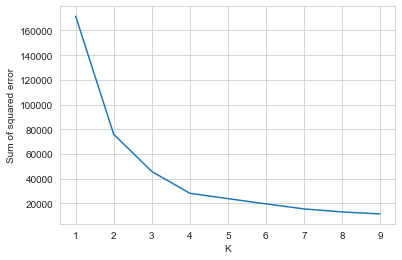

In [58]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Elbow is at 4. Hence our assumption that number of clusters = 4 is true

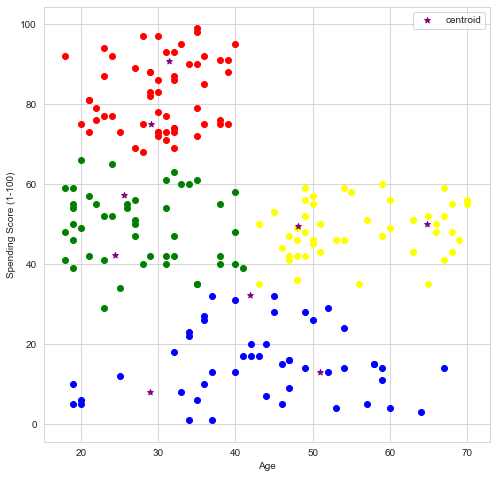

In [60]:
fig = plt.figure(figsize=(8,8))

dtcopy1 = dtcopy[dtcopy.cluster==0]
dtcopy2 = dtcopy[dtcopy.cluster==1]
dtcopy3 = dtcopy[dtcopy.cluster==2]
dtcopy4 = dtcopy[dtcopy.cluster==3]

plt.scatter(dtcopy1.Age,dtcopy1['Spending Score (1-100)'],color='green')
plt.scatter(dtcopy2.Age,dtcopy2['Spending Score (1-100)'],color='red')
plt.scatter(dtcopy3.Age,dtcopy3['Spending Score (1-100)'],color='blue')
plt.scatter(dtcopy4.Age,dtcopy4['Spending Score (1-100)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.legend()